# Numpy

## Numpy
NumPy is a Python library with rich set of function and objects for scientific computing.

## Numpy array
Most basic object of Numpy is ndarray (numpy.array), that is n-dimensional array similar to R's matrix. You can create array using `np.array()` function for example from a list:

In [1]:
import numpy as np
arr = np.array([1, 6, 2])
arr

array([1, 6, 2])

In [2]:
type(arr)

numpy.ndarray

## Basic operations with array
You can perform basic mathematical operations on array as though you would be working with Python scalar:

In [3]:
arr = np.array([1, 6, 2])
arr + 1

array([2, 7, 3])

In [4]:
arr / 3

array([0.33333333, 2.        , 0.66666667])

In [5]:
arr + arr

array([ 2, 12,  4])

## Data types
Each array has `dtype` attribute, an object describing the data type. As a consequence, unlike a list, numpy array can contain only one type of data. You can check type of your array calling `dtype` attribute.

In [6]:
arr = np.array([1, 2])
arr.dtype

dtype('int32')

## Data types
Numpy will try to infer a good data type for the array that it creates. If we mix string and int values for example, numeric values will be cast to strings.

In [7]:
arr = np.array(['abc', 1])
arr.dtype

dtype('<U3')

Here U3 means 3 character string.

## Shape and ndim attributes
The other important feature of arrays is that they can be multidimensional. This information is stored in two attributes `shape` and `ndim`. If we pass a nested sequence like a list, it will be converted into a multidimensional array.

In [5]:
l = [[1, 2, 3], [2, 5, 5]]
arr = np.array(l)
arr

array([[1, 2, 3],
       [2, 5, 5]])

In [6]:
arr.ndim

2

In [7]:
arr.shape

(2, 3)

Here we get a 2 by 3 array.

## Multidimensional arrays
We are not limited to two dimentional objects. Below we create 3 dimensional object by using `arange()` function which works in similar fashion to Python's built in `range()`. It returns a simple one dimensional array consisting of numbers from 0 to 35 and then we are reshaping it into 3 dimensional array. 

In [102]:
import numpy as np

a = np.arange(36).reshape(3, 4, 3)
a

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]],

       [[12, 13, 14],
        [15, 16, 17],
        [18, 19, 20],
        [21, 22, 23]],

       [[24, 25, 26],
        [27, 28, 29],
        [30, 31, 32],
        [33, 34, 35]]])

## Multidimensional arrays
Code above created 3 by 4 by 3 array, that is three 4x3 grids. Again using the `shape` attribute, we confirm that.

In [104]:
a.shape

(3, 4, 3)

### Excercise 1 (3 min)

Create 3 dimensional 5x2 array consisting of even numbers from 60 to 2.

## Indexing and slicing

For one-dimensional array, selecting subset of array works in similar fashion to ordinary Python list. Consider for example:

In [8]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [9]:
arr[5]

5

In [10]:
arr[4:8]

array([4, 5, 6, 7])

## Array vs list slicing
An important and somewhat suprising distinction between lists and arrays in terms of slicing is that array slices are views on the original array. This means that the data is not copied, and any modifications to the view will be reflected in the source array. Consider example below:

In [142]:
x = [1, 2, 3, 4]
y = x[2:4]
x, y

([1, 2, 3, 4], [3, 4])

In [143]:
y[1] = 100
x, y

([1, 2, 3, 4], [3, 100])

## Array vs list slicing

In [11]:
x = np.array([1, 2, 3, 4])
y = x[2:4]
x, y

(array([1, 2, 3, 4]), array([3, 4]))

In [12]:
y[1] = 100
x, y

(array([  1,   2,   3, 100]), array([  3, 100]))

## Array vs list slicing
When we implemented changes into an array slice y, the mutations are reflected in the original array x. In case of Python lists the changes are not propagated to the original object. To avoid this behaviour we must make an explicit copy when slicing.

In [147]:
x = np.array([1, 2, 3, 4])
y = x[2:4].copy()
x, y

(array([1, 2, 3, 4]), array([3, 4]))

In [148]:
y[1] = 100
x, y

(array([1, 2, 3, 4]), array([  3, 100]))

## Multidimensional array slicing
In two dimensional arrays, elements at each index are one-dimensional arrays:

In [151]:
arr = np.arange(10).reshape(2,5)
arr

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [152]:
arr[1]

array([5, 6, 7, 8, 9])

## Multidimensional array slicing
You can slice them as we save in previous examples:

In [154]:
arr[1][3:5]

array([8, 9])

## Multidimensional array slicing
You can achieve similar effect by passing a comma-separated list of indices to select individual elements.

In [155]:
arr[1, 3:5]

array([8, 9])

You can think of first element as selecting rows (axis 0) and second columns (axis 1).

## Multidimensional array slicing
Higher dimensional data follows similar pattern, where we can access individual elements recursively.

In [174]:
arr = np.array([[[1, 4, 8], [2, 5, 2]], [[8, 1, 3], [3, 1, 0]]])
arr

array([[[1, 4, 8],
        [2, 5, 2]],

       [[8, 1, 3],
        [3, 1, 0]]])

In [177]:
arr[0, 1, 1:]

array([5, 2])

In example above we select first 2x3 grid, then from second "row" elements starting from second to end.

### Excercise 2 (3 min)

You have 4 dimensional array. What is a location of elements [105, 106, 107]?

In [13]:
arr = np.arange(144).reshape(4, 3, 3, 4)

## Universal functions

A universal function, also known as ufunc, is a function that performs element-wise operations on data in ndarrays. You can think of them as fast __vectorized__ wrappers for simple functions that take one or more scalar values and produce one or more scalar results.

## Vectorization
One of key concepts in numpy is __vectorization__. It aims at replacing explicit loops, which are rather slow, with vectorized operations that delegate the looping internally to highly optimized C and Fortran functions. Let's for a example assume that we have a vector of values and we would like to count how many elements are smaller than next one. We could write a loop or try to write it in numpy:

In [20]:
vec = np.random.randint(0, 10, size=10000)

## Vectorization

In [27]:
%%timeit
count = 0
for x, y in zip(vec[:-1], vec[1:]):
    if x < y:
        count += 1

1.88 ms ± 52.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [28]:
%%timeit
count2 = np.count_nonzero(vec[:-1] < vec[1:])

10.3 µs ± 16.6 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [29]:
count = 0
for x, y in zip(vec[:-1], vec[1:]):
    if x < y:
        count += 1
count2 = np.count_nonzero(vec[:-1] < vec[1:])
count == count2

True

As can be seen above, Numpy was able to perform the operation about 132 times faster than a loop.

## Unary universal functions
Coming back to ufuncs, many of those functions perform simple element-wise transformation. They are called unary ufuncs. For example:

In [30]:
arr = np.arange(1,10)

In [31]:
np.square(arr)

array([ 1,  4,  9, 16, 25, 36, 49, 64, 81], dtype=int32)

In [32]:
np.log(arr)

array([0.        , 0.69314718, 1.09861229, 1.38629436, 1.60943791,
       1.79175947, 1.94591015, 2.07944154, 2.19722458])

## Binary universal functions
The second type of these functions are binary unfuncs, which take two arrays and return single one as a result. Consider following:

In [2]:
arr1 = np.random.randint(1,10, 10); arr2 = np.random.randint(1,10, 10)

In [34]:
arr1

array([2, 7, 1, 2, 8, 8, 3, 2, 3, 8])

In [35]:
arr2

array([1, 3, 5, 5, 1, 1, 8, 6, 2, 5])

In [36]:
np.maximum(arr1, arr2)

array([2, 7, 5, 5, 8, 8, 8, 6, 3, 8])

Here `np.maximum()` returns max value from each pair of values created from elements of arr1 and arr2. Full list of ufuncs can be found in [documentation](https://docs.scipy.org/doc/numpy-1.15.1/reference/ufuncs.html).

### Excercise 3 (3 min)

For given array arr find a function that returns a sign of each element.

In [37]:
arr = np.random.normal(size=15)

## Other Numpy functions
Numpy has also rich set of highly optimized [mathematical](https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.math.html) and [statistical](https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.statistics.html) functions, that perform various aggregations. They are sometimes duplicates of built-in Python function, but perform a lot better. For example Python has a `sum()` function which is also implemented as both method of array and stand alone numpy function. Both of numpy implementations work about 100x faster than built-in version.

In [38]:
vec = np.random.randint(0, 10, size=10000)

In [39]:
%%timeit
sum(vec)

966 µs ± 37.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [40]:
%%timeit
vec.sum()

8.47 µs ± 431 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [41]:
%%timeit
np.sum(vec)

9.84 µs ± 390 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


### Excercise 4 (3 min)

Using numpy's function standardize an array arr (deduct mean from each element and divide by standard deviation).

In [226]:
    arr = np.random.randint(0, 10, 20)

### Excercise 5 (20 min)

You are given an array of Microsoft stock prices from 2010. Write a function which takes an array as an input and calculates the highest profit you could achieve by buying and selling once (short selling is not allowed). Try to use numpy and vectorized operations.

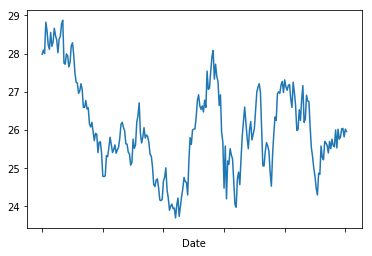

In [282]:
import pandas as pd
df = pd.read_csv('data/MSFT_2006-01-01_to_2018-01-01.csv')
df_sub = df.set_index('Date').loc['2011-01-01':'2012-01-01', 'Close']
df_sub.plot()
prices = df_sub.values